## Importing libraries

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

In [4]:
train_ref="pizza_steak/train"
test_ref="pizza_steak/test"

## Importing data

In [41]:
import pathlib
data_dir=pathlib.Path(train_ref)
classes=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(classes)

['pizza' 'steak']


## Preprocessing the data

In [6]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(rescale=1/255.,
                            width_shift_range=0.3,
                            height_shift_range=0.3,
                            zoom_range=0.2,
                            rotation_range=0.3,
                            horizontal_flip=True)
testgen=ImageDataGenerator(rescale=1/255.)
train_set=traingen.flow_from_directory(train_ref,target_size=(112,112),batch_size=32,class_mode="binary")
test_set=testgen.flow_from_directory(test_ref,target_size=(112,112),batch_size=32,class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## View Random Image


In [7]:
import random
def ViewRandomImage(target_dir,n):
  plt.figure(figsize=[12,10])
  for i in range(n):
    target_class=classes[random.randrange(len(classes))]
    target=target_dir+"/"+target_class
    random_image=random.sample(os.listdir(target),1)

    img=mpimg.imread(target+"/"+random_image[0])
    plt.subplot(n//3+1,3,i+1)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
  plt.show()
  return

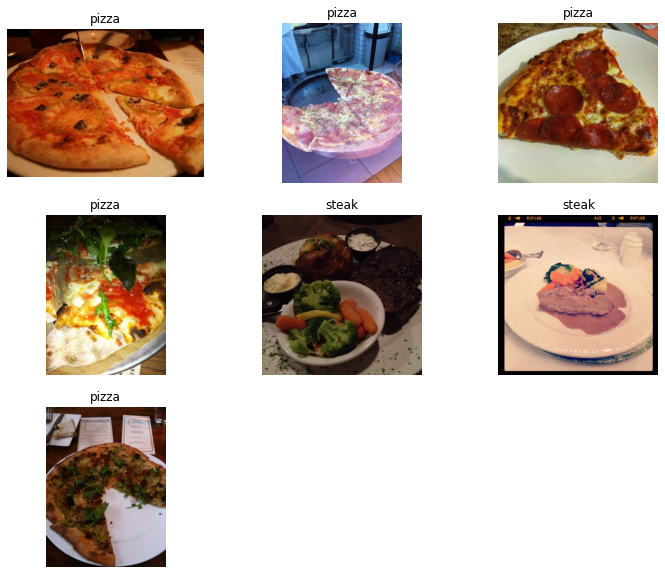

In [8]:
ViewRandomImage(train_ref,7)

## Build CNN

In [9]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[112,112,3],activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=128,activation="relu"))
model1.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

## Fit the model

In [11]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
hist1=model1.fit(x=train_set,validation_data=test_set,epochs=15)

Epoch 1/15
47/47 [==============================] - 13s 270ms/step - loss: 0.7372 - accuracy: 0.5960 - val_loss: 0.5744 - val_accuracy: 0.6720
Epoch 2/15
47/47 [==============================] - 11s 245ms/step - loss: 0.5705 - accuracy: 0.7033 - val_loss: 0.4143 - val_accuracy: 0.8200
Epoch 3/15
47/47 [==============================] - 12s 247ms/step - loss: 0.5098 - accuracy: 0.7513 - val_loss: 0.3534 - val_accuracy: 0.8520
Epoch 4/15
47/47 [==============================] - 12s 254ms/step - loss: 0.5070 - accuracy: 0.7687 - val_loss: 0.3698 - val_accuracy: 0.8220
Epoch 5/15
47/47 [==============================] - 11s 236ms/step - loss: 0.4972 - accuracy: 0.7633 - val_loss: 0.3758 - val_accuracy: 0.8480
Epoch 6/15
47/47 [==============================] - 11s 236ms/step - loss: 0.4563 - accuracy: 0.7960 - val_loss: 0.3540 - val_accuracy: 0.8560
Epoch 7/15
47/47 [==============================] - 11s 237ms/step - loss: 0.4596 - accuracy: 0.7793 - val_loss: 0.3116 - val_accuracy: 0.8600

In [52]:
def Open_and_Predict(file_name):
  test_image=plt.imread(file_name)
  test_image=resize(test_image,(112,112))
  test_image=np.expand_dims(test_image,axis=0)
  result=model1.predict(test_image)
  im=mpimg.imread(file_name)
  plt.imshow(im)
  plt.title(classes[round(result[0][0])])
  plt.axis("off")

## Finally making prediction

1/1 [==============================] - 0s 19ms/step


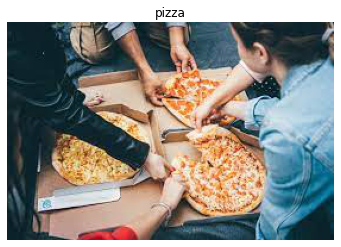

In [53]:
Open_and_Predict("pizza.jpeg")

1/1 [==============================] - 0s 21ms/step


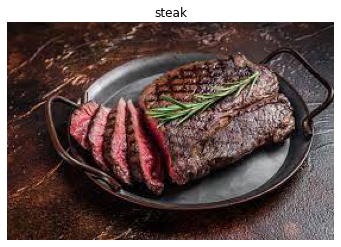

In [54]:
Open_and_Predict("steak.jpeg")